# Homework 2
<span style="font-size:1.25em"> Emre Kara  </span>  
<span style="font-size:1em"> 12.12.2020 </span>

## Data Load and Preparation

In [ ]:
#Libraries
require(dplyr, quietly = TRUE)
require(data.table, quietly = TRUE)
require(glue, quietly = TRUE)
require(rmarkdown, quietly = TRUE)
require(ggplot2, quietly = TRUE)
require(scatterplot3d, quietly = TRUE)
require(gridExtra, quietly = TRUE)
require(tidyr, quietly = TRUE)

In [2]:
#Dataload
axes <- c("X","Y","Z")
df <- list(); dftest <- list()

for (i in axes){
    df[[length(df) + 1]] <- fread(glue("Data/Train/uWaveGestureLibrary_{i}_TRAIN"))
    dftest[[length(dftest) + 1]] <- fread(glue("Data/Test/uWaveGestureLibrary_{i}_TEST"))
    
}

In [3]:
for (i in 1:3){
    
    ax = axes[i]
    
    #Train Data Preparation
    
    df[[i]][,"Observation"] = row.names(df[[i]])
    setcolorder(df[[i]], c(length(df[[i]]),1,2:(length(df[[i]])-1)))
    newcolnames <- c("Observation","Class",1:(length(df[[i]])-2)) #New Colnames
    setnames(df[[i]], new = newcolnames)
    
    acolname = glue("Acc{ax}")
    df[[i]] <- data.table(gather(df[[i]],"Time", !!acolname,3:length(df[[i]])))
    df[[i]][, Observation:= as.integer(Observation) ]
    df[[i]][, Class:= as.integer(Class) ]
    df[[i]][, Time:= as.integer(Time) ]
    
    for (o in unique(df[[i]]$Observation)){
        acolname = glue("Acc{ax}")
        speedcolname = glue("Speed{ax}")
        loccolname = glue("Loc{ax}")
        df[[i]][Observation==o, paste(speedcolname)] = cumsum(df[[i]][Observation==o, ..acolname])
        df[[i]][Observation==o, paste(loccolname)] = cumsum(df[[i]][Observation==o, ..speedcolname])
    }
    
    #Test Data Preparation
    
    dftest[[i]][,"Observation"] = row.names(dftest[[i]])
    setcolorder(dftest[[i]], c(length(dftest[[i]]),1,2:(length(dftest[[i]])-1)))
    newcolnames <- c("Observation","Class",1:(length(dftest[[i]])-2)) #New Colnames
    setnames(dftest[[i]], new = newcolnames)
    
    acolname = glue("Acc{ax}")
    dftest[[i]] <- data.table(gather(dftest[[i]],"Time", !!acolname,3:length(dftest[[i]])))
    dftest[[i]][, Observation:= as.integer(Observation) ]
    dftest[[i]][, Class:= as.integer(Class) ]
    dftest[[i]][, Time:= as.integer(Time) ]
    
    for (o in unique(dftest[[i]]$Observation)){
        acolname = glue("Acc{ax}")
        speedcolname = glue("Speed{ax}")
        loccolname = glue("Loc{ax}")
        dftest[[i]][Observation==o, paste(speedcolname)] = cumsum(dftest[[i]][Observation==o, ..acolname])
        dftest[[i]][Observation==o, paste(loccolname)] = cumsum(dftest[[i]][Observation==o, ..speedcolname])
    }
}


In [4]:
# Merging Tables

dfmelted <- merge(df[[1]], df[[2]], by = c("Observation","Time", "Class"), all=TRUE)
dfmelted <- merge(dfmelted, df[[3]], by = c("Observation","Time", "Class"), all=TRUE)

dftestmelted <- merge(dftest[[1]], dftest[[2]], by = c("Observation","Time", "Class"), all=TRUE)
dftestmelted <- merge(dftestmelted, dftest[[3]], by = c("Observation","Time", "Class"), all=TRUE)

which(is.na(dfmelted),TRUE);which(is.na(dftestmelted),TRUE)

head(dfmelted); head(dftestmelted)

row,col


row,col


Observation,Time,Class,AccX,SpeedX,LocX,AccY,SpeedY,LocY,AccZ,SpeedZ,LocZ
1,1,6,-0.3042432,-0.3042432,-0.3042432,-2.119396,-2.119396,-2.119396,-1.528965,-1.528965,-1.528965
1,2,6,-0.3042432,-0.6084864,-0.9127296,-2.119396,-4.238792,-6.358187,-1.528965,-3.057930,-4.586895
1,3,6,-0.3042432,-0.9127296,-1.8254593,-2.119396,-6.358187,-12.716375,-1.528965,-4.586895,-9.173791
1,4,6,-0.3042432,-1.2169728,-3.0424321,-2.119396,-8.477583,-21.193958,-1.528965,-6.115860,-15.289651
1,5,6,-0.3042432,-1.5212161,-4.5636481,-2.119396,-10.596979,-31.790937,-1.528965,-7.644825,-22.934476
1,6,6,-0.3042432,-1.8254593,-6.3891074,-2.119396,-12.716375,-44.507312,-1.528965,-9.173791,-32.108267


Observation,Time,Class,AccX,SpeedX,LocX,AccY,SpeedY,LocY,AccZ,SpeedZ,LocZ
1,1,5,1.557018,1.557018,1.557018,1.166554,1.166554,1.166554,1.861277,1.861277,1.861277
1,2,5,1.557018,3.114035,4.671053,1.166554,2.333108,3.499662,1.861277,3.722555,5.583832
1,3,5,1.557018,4.671053,9.342106,1.166554,3.499662,6.999324,1.861277,5.583832,11.167664
1,4,5,1.557018,6.228070,15.570176,1.166554,4.666216,11.665540,1.861277,7.445109,18.612773
1,5,5,1.557018,7.785088,23.355264,1.166554,5.832770,17.498310,1.861277,9.306387,27.919159
1,6,5,1.557018,9.342106,32.697370,1.166554,6.999324,24.497634,1.861277,11.167664,39.086823


## Task a

In [5]:
table(dfmelted[,Class],dnn = "Counts");
obs <- data.table(aggregate(dfmelted$Observation, list(dfmelted$Class), first)); obs

Counts
    1     2     3     4     5     6     7     8 
38430 34020 33390 34650 40005 34965 35280 31500 

Group.1,x
1,11
2,15
3,4
4,5
5,2
6,1
7,7
8,6


### Plots of Examples from Each Class

An observation from each class is visualized using location data. Points go from brighter to darker as time goes up.

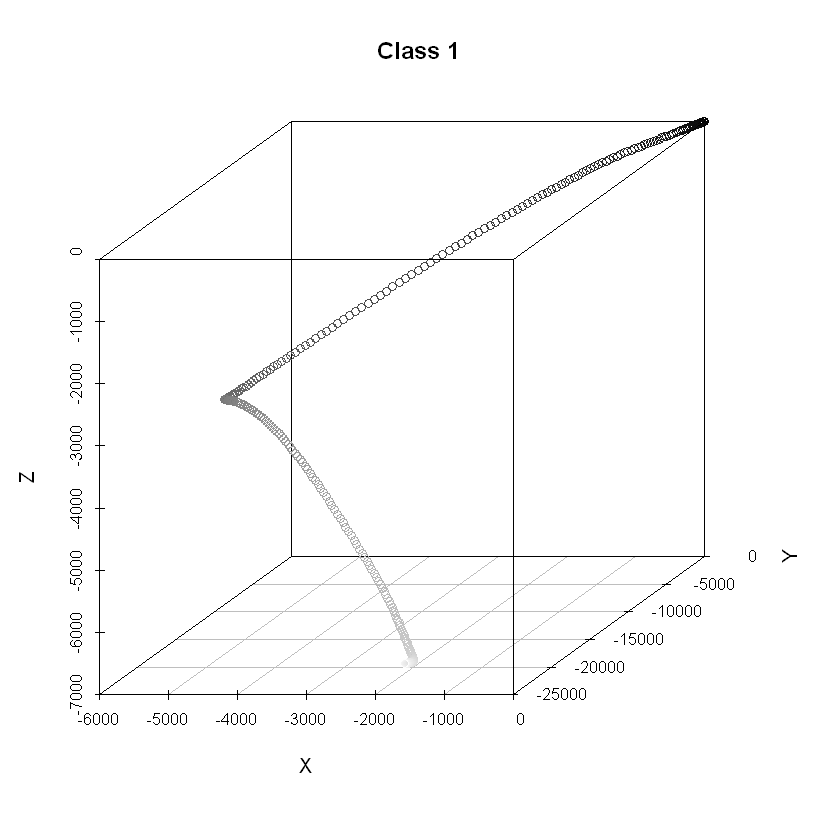

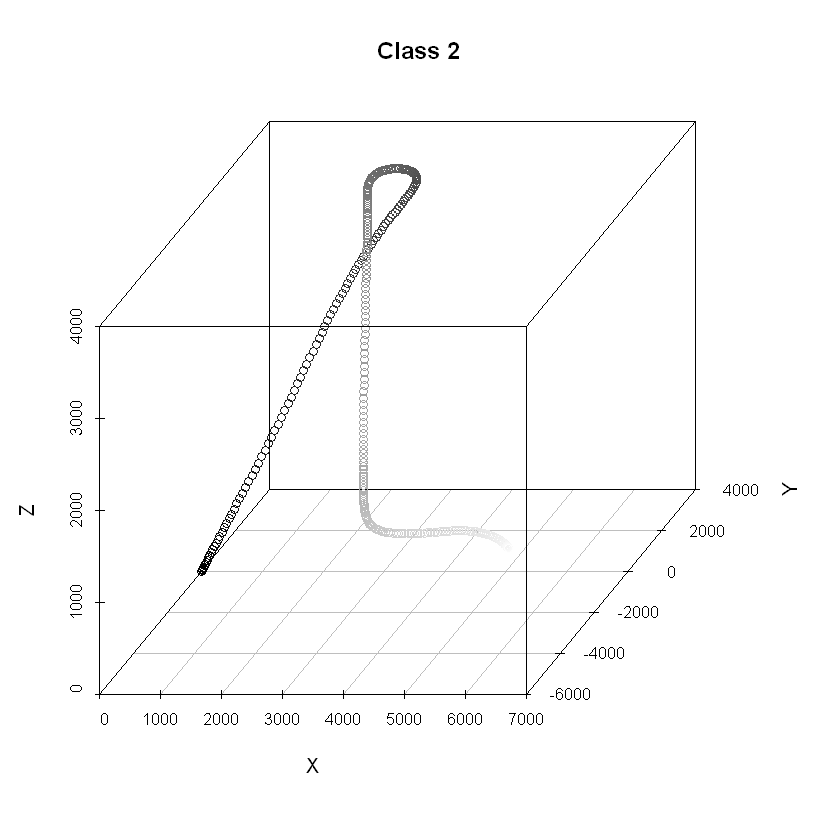

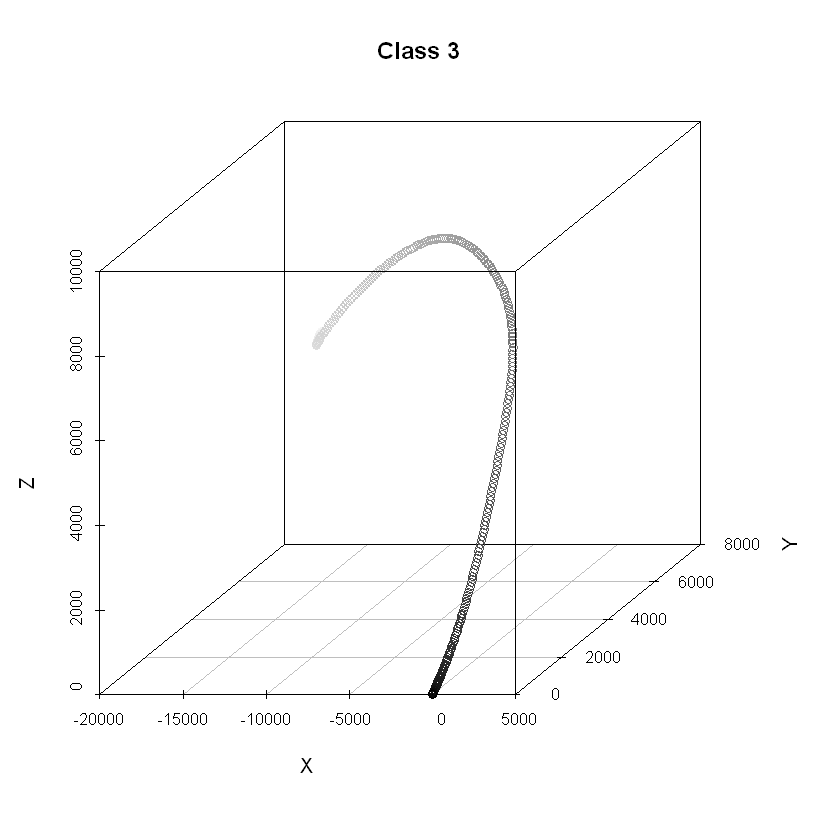

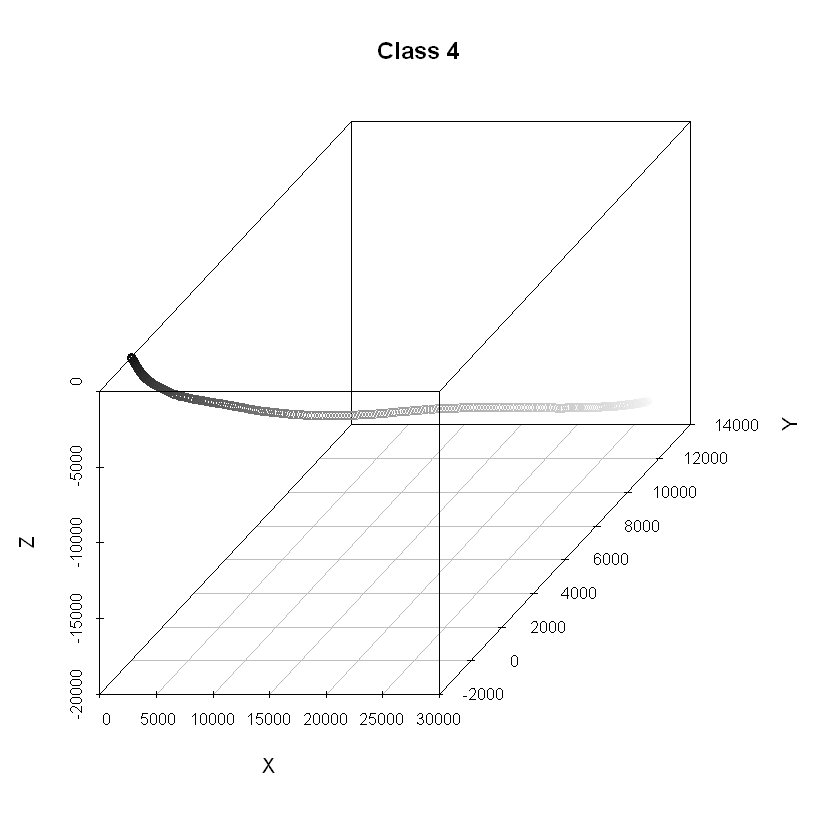

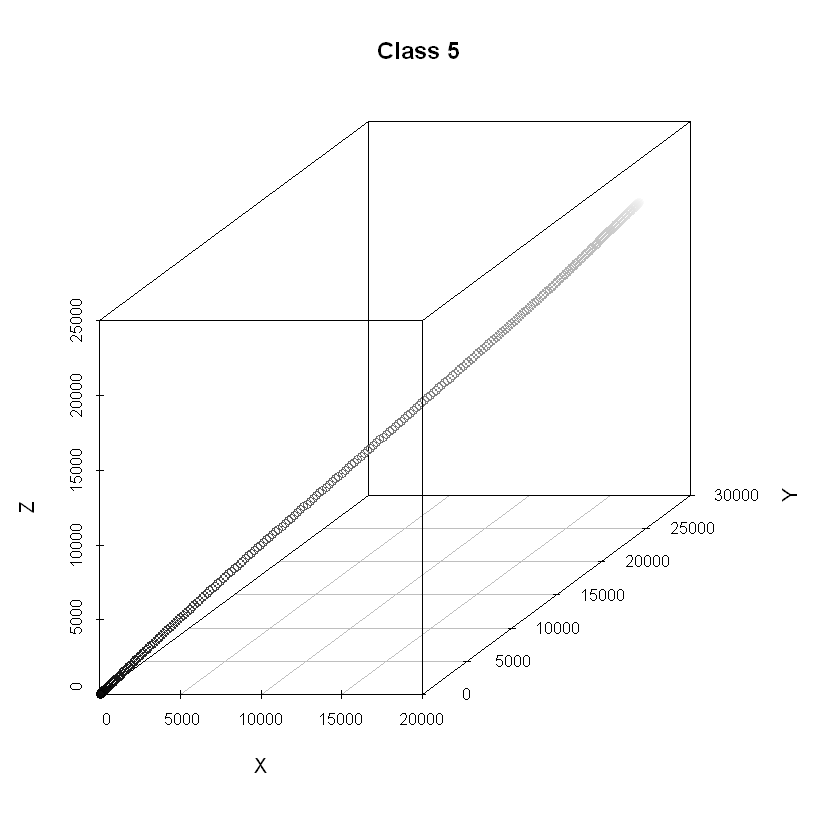

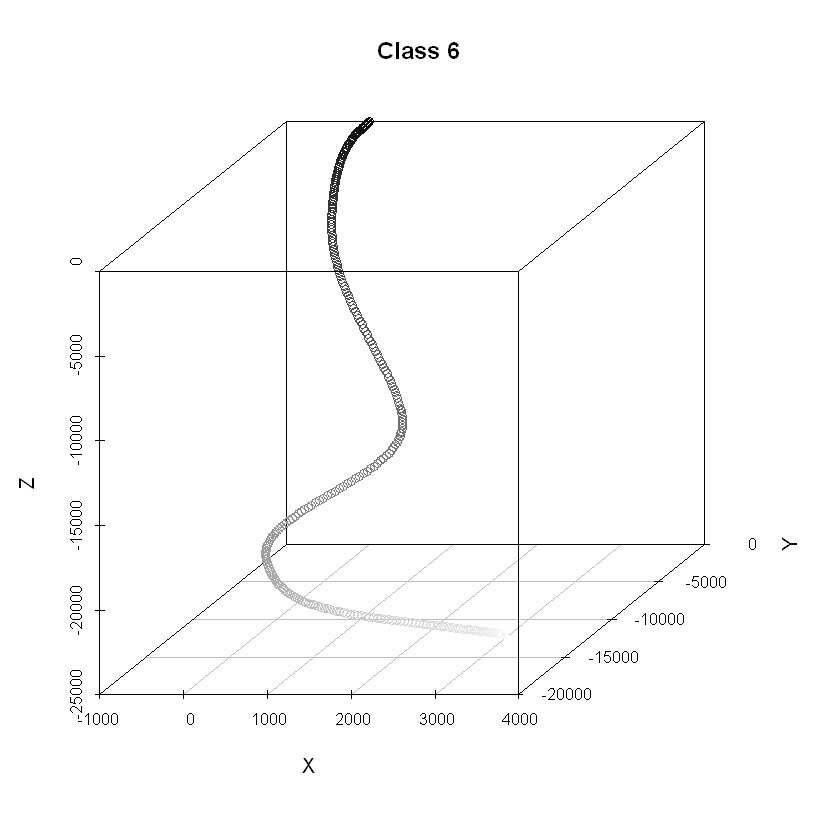

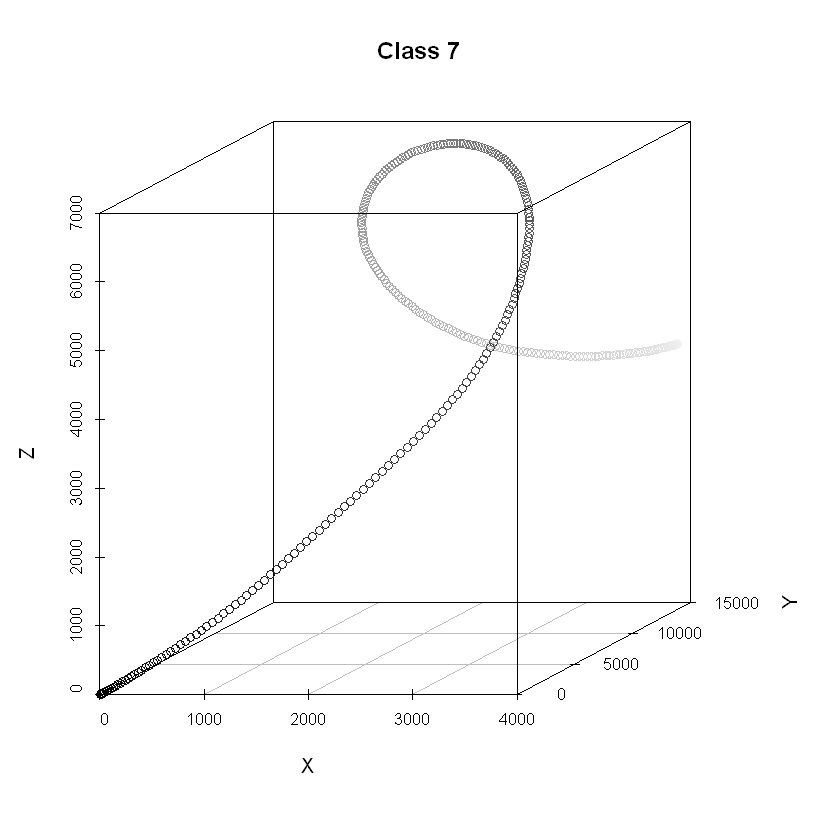

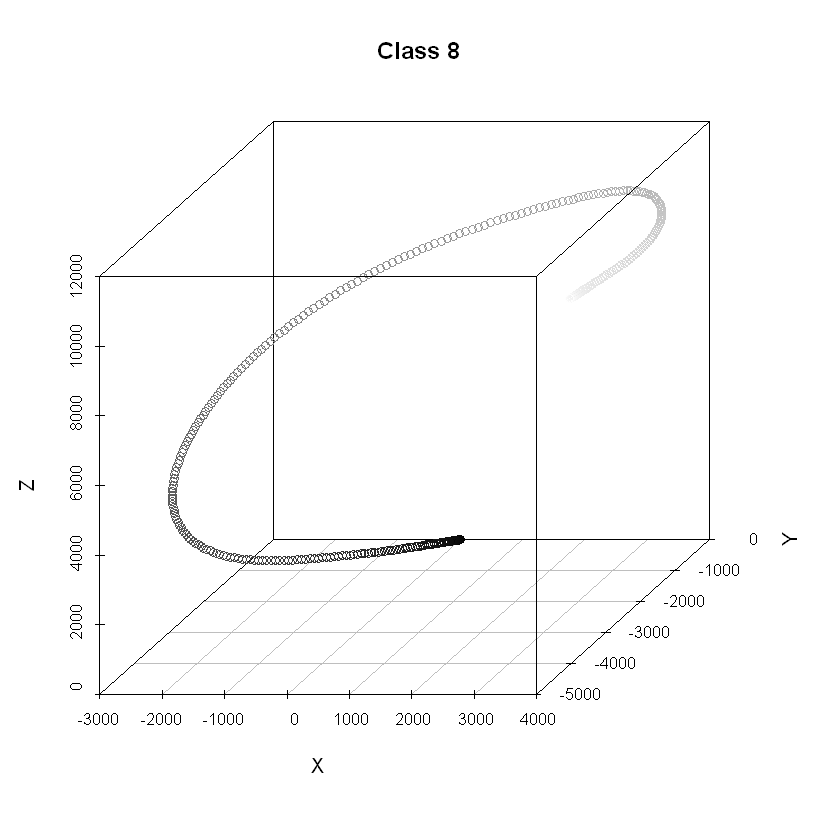

In [6]:
idx = dfmelted$Observation == obs[1,2][[1]]; Title = "Class 1"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))
    
idx = dfmelted$Observation == obs[2,2][[1]]; Title = "Class 2"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))

idx = dfmelted$Observation == obs[3,2][[1]]; Title = "Class 3"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))

idx = dfmelted$Observation == obs[4,2][[1]]; Title = "Class 4"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))

idx = dfmelted$Observation == obs[5,2][[1]]; Title = "Class 5"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))

idx = dfmelted$Observation == obs[6,2][[1]]; Title = "Class 6"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))

idx = dfmelted$Observation == obs[7,2][[1]]; Title = "Class 7"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))

idx = dfmelted$Observation == obs[8,2][[1]]; Title = "Class 8"
scatterplot3d(dfmelted$LocX[idx],dfmelted$LocY[idx],dfmelted$LocZ[idx],
              xlab = "X", ylab = "Y", zlab = "Z", main = Title, 
              color = grey((1:length(dfmelted$LocX[idx]))/length(dfmelted$LocX[idx])))


## Task b

#### Making PCA Transformation 3D -> 1D

In [7]:
m1 <- prcomp(dfmelted[,c("LocX","LocY","LocZ")],scale = TRUE)

In [8]:
m1

Standard deviations (1, .., p=3):
[1] 1.2724995 1.0380930 0.5505524

Rotation (n x k) = (3 x 3):
           PC1        PC2        PC3
LocX 0.2092858 -0.9084781  0.3617554
LocY 0.7231731 -0.1052159 -0.6826055
LocZ 0.6581946  0.4044714  0.6349668

Principal component with highest standard deviaton value has the formula:

$$ PC_{1,i} = 0.2092858 \times X_{i} + 0.7231731 \times Y_{i} + 0.6581946 \times Z_{i} $$

#### Plotting PC1's of Classes

In [9]:
PC1 <- function(x,y,z) 0.2092858*x + 0.7231731*y + 0.6581946*z

In [10]:
obs = NULL
obs <- append(obs,sample(unique(dfmelted[Class ==1,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==2,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==3,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==4,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==5,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==6,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==7,Observation]),2))
obs <- append(obs,sample(unique(dfmelted[Class ==8,Observation]),2))
obs

[1]  59 378 193 111 729 239 342 690 494 480 169 716 330 260 105 278

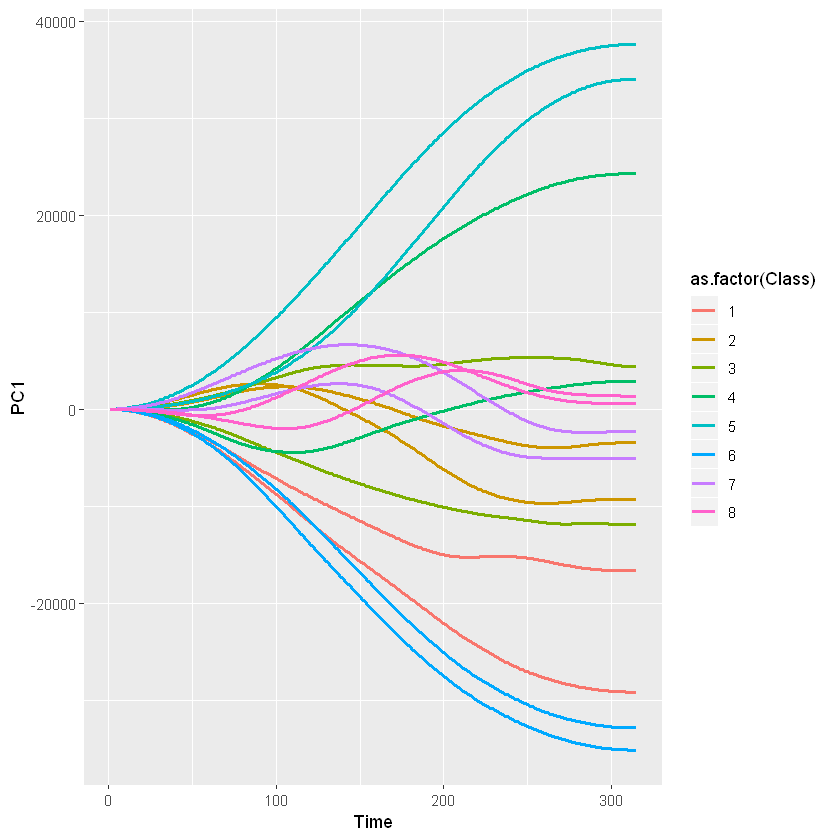

In [43]:
fig <- ggplot()
data = list()

for (i in 1:length(obs)){
    data[[ length(data)+1 ]] <- dfmelted[Observation == obs[i]]
}

fig <- fig +
geom_line(data = data[[1]],aes(1: dim(data[[1]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[2]],aes(1: dim(data[[2]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[3]],aes(1: dim(data[[3]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[4]],aes(1: dim(data[[4]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[5]],aes(1: dim(data[[5]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[6]],aes(1: dim(data[[6]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[7]],aes(1: dim(data[[7]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[8]],aes(1: dim(data[[8]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[9]],aes(1: dim(data[[9]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[10]],aes(1: dim(data[[10]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[11]],aes(1: dim(data[[11]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[12]],aes(1: dim(data[[12]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[13]],aes(1: dim(data[[13]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[14]],aes(1: dim(data[[14]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[15]],aes(1: dim(data[[15]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
geom_line(data = data[[16]],aes(1: dim(data[[16]])[1],PC1(LocX,LocY,LocZ),group = as.factor(Class), col = as.factor(Class)), size =1 ) +
ylab('PC1')+xlab('Time')
fig



When we look ak the plot, we see that distance between lines generally increases as time goes up. Hence, we can look at final values for classification. Class 5 and 6 end up at the uppermost and lowermost values in the plot. Class 1, which finishes the series above 6, also can be seperated from class 6 and the classes in the middle. Finally, PC1 values of examples from class 8 are very close to each other. If the rest of the observations are around these values, this class can be distinguished from others easily.

Rest of the classes look problematic though. PC1 values belong to these classes came out between each other. The most difficult looking one is class 3, whose observations have PC1 values around classes  2,7 and 8.This class seem to have dispersed PC1 values and it will be hard to distinguish it from the other classes using PC1 statistic. It is also possible to determine an interval for class 4 although smaller PC1 value is less than greater PC1 value of an observation from class 3 if values belonging to the rest of the observations are between these two.

## Task c

In [56]:
pcamodels <- list()
for (i in 1:8){
    pcamodels[[i]] <- prcomp(dfmelted[Class==i,c("LocX","LocY","LocZ")],scale = TRUE)
}

### Class 1

In [67]:
pcamodels[[1]];
( pcamodels[[1]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.2932492 1.0091473 0.5559931

Rotation (n x k) = (3 x 3):
           PC1         PC2        PC3
LocX 0.1192782  0.97300528  0.1975688
LocY 0.6932689 -0.22406752  0.6849613
LocZ 0.7107398  0.05526735 -0.7012806

[1] 55.74978 33.94594 10.30428

By looking at variance values, it can be said that first component covers **$55.75\%$** of the variance in the model. **$33.95\%$** and **$10.30\%$** of the variance is explaned by second and third component respectively.

Coefficients of **LocZ** and **LocY** variables are **$0.7107398$** and **$0.6932689$** for PC1 response variable. These variables are most significant ones in distinguishing Class 1. **LocX** variable with **$0.1192782$** coefficient is the least significant one among these observations. The probability of a gesture being in class 1 increases as coordinate values increase in general.

### Class 2

In [68]:
pcamodels[[2]];
( pcamodels[[2]]$sdev^2/sum(pcamodels[[2]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.1286537 0.9457021 0.9120243

Rotation (n x k) = (3 x 3):
            PC1        PC2        PC3
LocX -0.5353964 -0.8143691  0.2239501
LocY -0.6126143  0.1919057 -0.7667306
LocZ -0.5814244  0.5476999  0.6016398

[1] 42.46197 29.81175 27.72628

Principal components explain *$42.46\%$*, *$29.81\%$* and *$27.72\%$* of the variance respectively. PC1 of this model explains less variability than the first model.

PC1 Coefficients are **$-0.5353964$**, **$-0.6126143$** and **$-0.5814244$**. All coefficients are negative. Thus, being in Class 2 is inversely proportional to the distance from the origin. From the results it can also be said that Class 2 gestures distinguish themselves mostly in their Y coordinates which is followed by Z. The effect of X coordinates are close although it is the least effective one.

### Class 3

In [69]:
pcamodels[[3]];
( pcamodels[[3]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.2156489 1.0027730 0.7187794

Rotation (n x k) = (3 x 3):
            PC1         PC2        PC3
LocX -0.7091356 0.005581685  0.7050501
LocY -0.3714170 0.847018528 -0.3802749
LocZ  0.5993130 0.531534061  0.5985778

[1] 49.26008 33.51846 17.22146

Principal components explain *$49.26\%$*, *$33.52\%$* and *$17.22\%$* of the variance respectively. PC1 transformation explains more than model 2 and less than model 1.

PC1 Coefficients are **$-0.7091356$**, **$-0.3714170$** and **$0.5993130$**. Result of this model is interesting as Z coordinate coefficient is positive and the others are negative. This means that gestures belonging to this class mostly consists of motions through +Z direction and -X,-Y directions.

### Class 4

In [70]:
pcamodels[[4]];
( pcamodels[[4]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.2855781 0.9914895 0.6035210

Rotation (n x k) = (3 x 3):
            PC1         PC2        PC3
LocX  0.7018889 -0.04016825  0.7111529
LocY  0.6740385 -0.28531139 -0.6813733
LocZ -0.2302696 -0.95759278  0.1731820

[1] 55.09037 32.76838 12.14125

Principal components explain $55.09\%$, $32.77\%$ and $12.14\%$ of the variance respectively. PC1 transformation is as powerful as first model in explaining variability.

PC1 Coefficients are $0.7018889$, $0.6740385$ and $-0.2302696$. Probability of being in Class 4 is affected significantly by increasing X and Y values. Decreasing Z values have small effect on Class 4 classification.

### Class 5

In [71]:
pcamodels[[5]];
( pcamodels[[5]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.4038307 0.9685920 0.3018095

Rotation (n x k) = (3 x 3):
           PC1        PC2         PC3
LocX 0.2447432  0.9695753 -0.00493898
LocY 0.6852038 -0.1765608 -0.70662724
LocZ 0.6860004 -0.1695580  0.70756876

[1] 65.691351 31.272350  3.036299

Principal components explain $65.69\%$, $31.27\%$ and $3.04\%$ of the variance respectively. PC1 transformation is the most powerful one so far.

PC1 Coefficients are $0.2447432$, $0.6852038$ and $0.6860004 $. Class 5 observations are in a correlation with Y and Z coordinates. X coordinates have less significance among Class 5 gestures.

### Class 6

In [72]:
pcamodels[[6]];
( pcamodels[[6]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.3400570 0.9638120 0.5247033

Rotation (n x k) = (3 x 3):
            PC1       PC2         PC3
LocX  0.2914464 0.9545361 -0.06260863
LocY -0.6705561 0.2505396  0.69827247
LocZ -0.6822122 0.1615264 -0.71308885

[1] 59.858428 30.964453  9.177119

Principal components explain $59.86\%$, $30.96\%$ and $9.18\%$ of the variance respectively. Variance explained by PC1 latent variable looks significant.

PC1 Coefficients are $0.2914464$, $-0.6705561$ and $-0.6822122$. Class 6 observations are highly affected from and inversely proportional with Y and Z coordinates. Considering class 5, X coordinates have higher effect in this model but yet it is the least significant one.

### Class 7

In [73]:
pcamodels[[7]];
( pcamodels[[7]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.2971922 0.8883869 0.7266781

Rotation (n x k) = (3 x 3):
            PC1        PC2        PC3
LocX -0.5959625  0.4866072  0.6387817
LocY -0.6316921  0.2070350 -0.7470620
LocZ -0.4957760 -0.8487343  0.1840008

[1] 56.09026 26.30771 17.60203

Principal components explain $56.09\%$, $26.31\%$ and $17.60\%$ of the variance respectively. PC1 value has an above average variance value.

PC1 coefficients are all negative: $-0.5959625$, $-0.6316921$ and $-0.4957760$ respectively. Absolute values of all coefficients are large compared with other models. This means Class 7 gestures are significantly inversely proportional with all coordinate values being Y as the most significant one.

### Class 8

In [74]:
pcamodels[[8]];
( pcamodels[[8]]$sdev^2/sum(pcamodels[[1]]$sdev^2) )*100

Standard deviations (1, .., p=3):
[1] 1.2203138 0.9683089 0.7571078

Rotation (n x k) = (3 x 3):
           PC1        PC2         PC3
LocX 0.6637304 -0.2527282  0.70398181
LocY 0.3367113  0.9413848  0.02049627
LocZ 0.6678978 -0.2234346 -0.70992219

[1] 49.63886 31.25407 19.10707

Principal components explain $49.64\%$, $31.25\%$ and $19.11\%$ of the variance respectively. PC1 variance is the third smallest one.

PC1 Coefficients are all positive. Coefficients are $0.6637304$, $0.3367113$ and $0.6678978$. Class 8 observations are positively proportional with coordinate values. X and Z locations look equally significant while Y seems the least significant one.

### Summary

Summarizing coefficients of PCA1 (0.50 is taken as a threshold value)
1. 0,+,+
2. -,-,-
3. -,-,+
4. +,+,0
5. 0,+,+
6. 0,-,-
7. -,-,0
8. +,0,+

Classes seem seperable except Class 1 and 5. This result is different here as in Task b, it was not an issue to seperate Class 1 and 5. Adding new observations may have changed the result as there were just 2 observations in Task b. Also this can be a result of different approach.

Another point is that, Class 2 and 7 both have all negative coefficients. In task b, this two classes came out with similar results as well. In terms of comparing Class 2 and 7, we can say that results of Task b and c are similar.


## Task d

In [106]:
#Dataload
axes <- c("X","Y","Z")
df <- list(); dftest <- list()

for (i in axes){
    df[[length(df) + 1]] <- fread(glue("Data/Train/uWaveGestureLibrary_{i}_TRAIN"))
    dftest[[length(dftest) + 1]] <- fread(glue("Data/Test/uWaveGestureLibrary_{i}_TEST"))
    
}

### Distance Matrix Calculation

Distance formulas are:

$ d_{C,i,j} = \sqrt{ \sum{(a_{i} - a_{j})^2} } \quad  \forall i,j \in Obs. \quad C = X,Y,Z $

Combining all three distanceswe obtain general distance terms:

$ d_{i,j} = \sqrt{ d_{X,i,j}^2 + d_{Y,i,j}^2 +d_{Z,i,j}^2} \quad  \forall i,j \in Obs. $

In [107]:
distX <- as.matrix(dist(df[[1]][,-1], method = "euclidean"))
distY <- as.matrix(dist(df[[2]][,-1], method = "euclidean"))
distZ <- as.matrix(dist(df[[3]][,-1], method = "euclidean"))

In [108]:
distXYZ <- sqrt(distX^2 + distY^2 + distZ^2 ); head(distXYZ)

1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
0.00000,51.30385,46.49263,50.00557,40.53065,48.77339,49.78434,34.47481,38.36707,30.47860,...,46.01287,39.73031,41.26587,37.26560,52.64993,34.61732,40.36802,43.59052,47.17981,52.29014
51.30385,0.00000,26.15062,36.84757,32.71092,37.63036,38.19377,50.04145,37.77742,57.60482,...,46.03559,49.01368,32.31978,49.04021,34.11599,44.40307,54.65286,41.24253,43.26349,24.41367
46.49263,26.15062,0.00000,43.11491,34.68557,34.77018,52.90127,45.07319,39.31871,54.02186,...,49.77938,43.33303,34.88315,48.61401,36.60350,37.87980,49.85753,47.86957,52.75303,23.00783
50.00557,36.84757,43.11491,0.00000,45.09594,41.03078,39.72564,55.62494,49.68671,44.87356,...,41.21545,38.46376,47.07113,44.03824,33.65578,43.62841,45.17318,36.47610,37.77271,37.73935
40.53065,32.71092,34.68557,45.09594,0.00000,36.55246,44.96919,34.49307,20.71561,48.63792,...,47.36377,53.91140,17.27920,36.79339,49.61586,44.74386,44.68900,45.79881,44.43520,39.75526
48.77339,37.63036,34.77018,41.03078,36.55246,0.00000,48.51623,48.43767,42.56081,51.06056,...,48.74836,52.96310,37.81844,42.26116,40.39066,46.14251,39.92165,43.24382,47.93611,32.42908


In [109]:
modelmds <- cmdscale(distXYZ)

### Visualization of Results

In [122]:
finaldata <- cbind(df[[1]][,1],modelmds ); head(finaldata,10)

V1,V1,V2
6,15.383398,14.833435
5,-27.454443,-4.121066
5,-22.189073,15.005511
3,-8.326597,-14.042294
4,-9.602607,11.221899
8,-13.280966,8.761481
7,-2.460507,-22.692845
4,10.190133,16.005871
4,-5.965854,13.359863
6,24.632023,2.470865


In [123]:
setnames(finaldata,"V1","Class");head(finaldata)

Warning message in setnames(finaldata, "V1", "Class"):
"Item 1 of 'old' is 'V1' which appears several times in column names. Just the first will be changed. There are 0 other items in old that are also duplicated in column names."

Class,V1,V2
6,15.383398,14.833435
5,-27.454443,-4.121066
5,-22.189073,15.005511
3,-8.326597,-14.042294
4,-9.602607,11.221899
8,-13.280966,8.761481


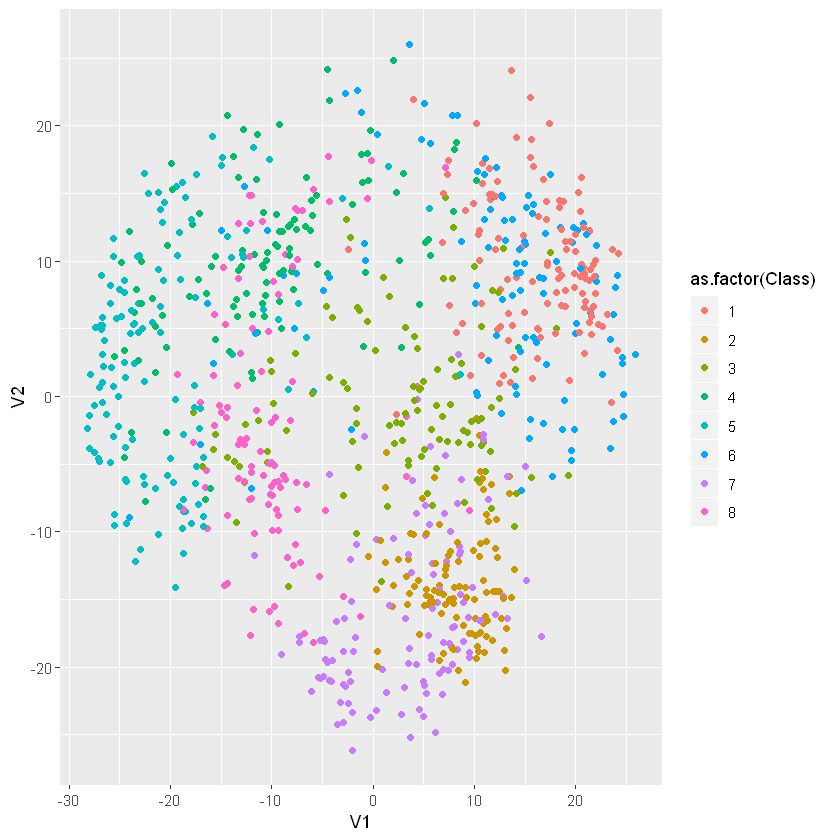

In [126]:
qplot(data = finaldata,V1,V2,col=as.factor(Class))

When we look at the plot, it is possible to guess different central points for each class. Some class pairs look linearly seperable and quite distinct. For example Class 7 and 5; Class 2 and 5; Class 1 and 8. However, there are many classes that have large intersection. Class 4, 5 and 8; Class 6 and 8; Class 2 and 7 can be given as examples.

### References

[1] J. Liu, Z. Wang, L. Zhong, J. Wickramasuriya, and V. Vasudevan. uWave: Accelerometer-based
personalized gesture recognition and its applications. Pervasive Computing and Communications,
IEEE International Conference on, 0:1-9, 2009.
(link: http://www.ruf.rice.edu/~mobile/publications/liu09percom.pdf)